## Read images

In [37]:
import cv2
import numpy as np
import glob
import pylab as plt
from PIL import Image
%matplotlib inline


folders = glob.glob('/home/mansoureh/DZNE/images/ch1/*.BMP')
folders.sort()
imagenames_list = []
for f in folders:
    imagenames_list.append(f)

read_images = [] 
for image in imagenames_list:
    read_images.append(cv2.imread(image))
images_ch1 = np.asarray(read_images) 

folders = glob.glob('/home/mansoureh/DZNE/images/ch2/*.BMP')
folders.sort()
imagenames_list = []
for f in folders:
    imagenames_list.append(f)

read_images = [] 
for image in imagenames_list:
    read_images.append(cv2.imread(image))
images_ch2 = np.asarray(read_images)    



## Mask images

In [38]:
n_images = [] 
for idx in range(96):
    img = images_ch1[idx]
    img_nucleus = images_ch2[idx]
    img_nucleus = np.array(img_nucleus * [3, 0, 2])
    img = np.array(img * [2, 2, 0])
    n_images.append(cv2.addWeighted(img, 1, img_nucleus, 1, 50))
 

## Measuring the nuclear transport for each image

In [39]:
def nuclear_transport(n_img):
    # getting the cells
    frame = n_img.copy()
    cell_hsvmax = (255,255,204)
    cell_hsvmin = (102,0,51)
    open_thresh = cv2.inRange(frame, cell_hsvmin, cell_hsvmax)


    # getting the nucleus
    frame = img_nucleus.copy()
    cell_hsvmax = (255,255,255)
    cell_hsvmin = (0,0,0)
    nucleus_open_thresh = cv2.inRange(frame, cell_hsvmin, cell_hsvmax)

    # Measuring nuclear_transport
    frame = n_img.copy()
    cells = []
    cells_ratio = []
    contours,hierachy = cv2.findContours(open_thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area == 0:
            continue
        cells.append(cnt)
        nucleus_mask = np.zeros(frame.shape[:2], 'uint8')
        hull = cv2.convexHull(cnt)
        cv2.drawContours(nucleus_mask, [hull], -1, 255, -1);
        nucleus_mask = cv2.bitwise_and(nucleus_open_thresh, nucleus_mask)
        nucleus_area = np.count_nonzero(nucleus_mask)

        ratio = nucleus_area / area
        cells_ratio.append(ratio)
        return np.average(cells_ratio)
           

In [40]:
cell_transport_val = np.zeros((8,12))
for i in range(8):
    for j in range(12):
        n_img = n_images[i+j].copy()
        cell_transport_val[i][j] = nuclear_transport(n_img) 

# Generating a table to show the results

In [41]:
import pandas as pd
data = pd.DataFrame(cell_transport_val,index =['A', 'B', 'C', 'D','E','F','G','H'], columns = ["1", "2", "3", "4","5","6","7","8","9","10","11","12"])
data

,1,2,3,4,5,6,7,8,9,10,11,12
A,6.000000,1.527778,10.000000,1.637475,2.785714,2.571429,5.333333,4.210526,4.000000,2.384615,2.000000,3.804878
B,1.527778,10.000000,1.637475,2.785714,2.571429,5.333333,4.210526,4.000000,2.384615,2.000000,3.804878,20.666667
C,10.000000,1.637475,2.785714,2.571429,5.333333,4.210526,4.000000,2.384615,2.000000,3.804878,20.666667,1.425000
D,1.637475,2.785714,2.571429,5.333333,4.210526,4.000000,2.384615,2.000000,3.804878,20.666667,1.425000,2.181818
E,2.785714,2.571429,5.333333,4.210526,4.000000,2.384615,2.000000,3.804878,20.666667,1.425000,2.181818,2.117647
F,2.571429,5.333333,4.210526,4.000000,2.384615,2.000000,3.804878,20.666667,1.425000,2.181818,2.117647,1.584699
G,5.333333,4.210526,4.000000,2.384615,2.000000,3.804878,20.666667,1.425000,2.181818,2.117647,1.584699,2.351351
H,4.210526,4.000000,2.384615,2.000000,3.804878,20.666667,1.425000,2.181818,2.117647,1.584699,2.351351,0.076923


## Plot dose-response-curves of nuclear transport Wortmannin


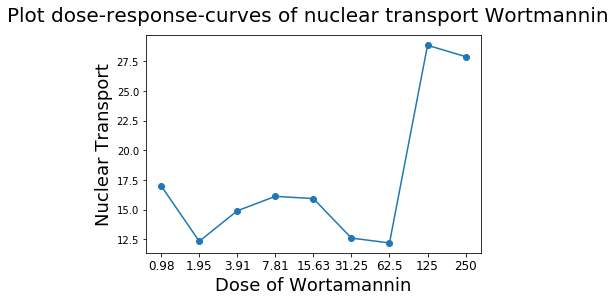

In [42]:
idx = [0.98,1.95,3.91,7.81,15.63,31.25,62.5,125,250]
y_wor = np.zeros(9)
k = -1
for j in range(2,11):
    k = k + 1
    for i in range(0,4):       
          y_wor[k] = cell_transport_val[i][j] + y_wor[k]
    
idx1 = [0,1,2,3,4,5,6,7,8]
new_y = [y_wor[i] for i in idx1]
plt.plot(range(len(idx)), new_y, 'o-')
plt.xticks(range(len(idx)),idx, size = 12)
plt.suptitle('Plot dose-response-curves of nuclear transport Wortmannin', fontsize=20)
plt.ylabel('Nuclear Transport',  fontsize=18)
plt.xlabel('Dose of Wortamannin', fontsize=18)
plt.show()

## Plot dose-response-curves of nuclear transport LY294.002

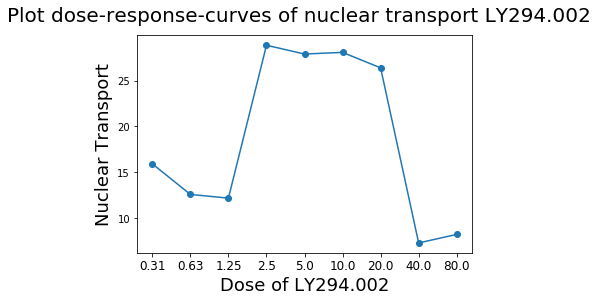

In [7]:
idx = [0.31,0.63,1.25,2.50,5.00,10.00,20.00,40.00,80.00]
y_ly = np.zeros(9)
k = -1
for j in range(2,11):
    k = k + 1
    for i in range(4,8):       
          y_ly[k] = cell_transport_val[i][j] + y_ly[k]
    
idx1 = [0,1,2,3,4,5,6,7,8]
idx1 = [0,1,2,3,4,5,6,7,8]
new_y = [y_ly[i] for i in idx1]
plt.plot(range(len(idx)), new_y, 'o-')
plt.xticks(range(len(idx)),idx, size = 12)
plt.suptitle('Plot dose-response-curves of nuclear transport LY294.002', fontsize=20)
plt.ylabel('Nuclear Transport', fontsize=18)
plt.xlabel('Dose of LY294.002', fontsize=18)
plt.show()

## Statistics

### Calculating the significant effect of Wortmanin and LY294.002 on nuclear transport based on Z-factor


In [8]:
from tabulate import tabulate
avg_pos = 0
avg_neg = 0
std_pos = 0
std_neg = 0

y_no_drug_wor = np.zeros(12)
k = -1
for i in range(0,4):  
    k = k +1
    y_no_drug_wor[k] = cell_transport_val[i][0]
    k = k +1
    y_no_drug_wor[k] = cell_transport_val[i][1]
    k = k +1
    y_no_drug_wor[k] = cell_transport_val[i][11]
    
y_no_drug_ly = np.zeros(12)
k = -1
for i in range(4,8):  
    k = k +1
    y_no_drug_ly[k] = cell_transport_val[i][0]
    k = k +1
    y_no_drug_ly[k] = cell_transport_val[i][1]
    k = k +1
    y_no_drug_ly[k] = cell_transport_val[i][11]
    
y_both = [y_wor,y_ly]
y_both_no_drug = [y_no_drug_wor,y_no_drug_ly]


# measure z-factor for Wortmanin
avg_pos = np.average(y_wor)
avg_neg = np.average(y_no_drug_wor)
std_pos = np.std(y_wor)
std_neg = np.std(y_no_drug_wor)
z_wor = 1 - ((3 * (avg_pos + avg_neg))/(abs(std_pos - std_neg)))

# measure z-factor for lY294
avg_pos = np.average(y_ly)
avg_neg = np.average(y_no_drug_ly)
std_pos = np.std(y_ly)
std_neg = np.std(y_no_drug_ly)
z_ly = 1 - ((3 * (avg_pos + avg_neg))/(abs(std_pos - std_neg)))

# measure z-factor for both drugs
avg_pos = np.average(y_both)
avg_neg = np.average(y_both_no_drug)
std_pos = np.std(y_both)
std_neg = np.std(y_both_no_drug)
z_both = 1 - ((3 * (avg_pos + avg_neg))/(abs(std_pos - std_neg)))


print (tabulate([[z_wor,z_ly,z_both]], headers=['Z-factor Wortmannin', 'Z-factor LY294002', 'Z-factor both']))

  Z-factor Wortmannin    Z-factor LY294002    Z-factor both
---------------------  -------------------  ---------------
             -140.395             -8.20219          -19.697


### Dose Wortmanin and LY294.002 have a significant difference from each other

In [9]:
from tabulate import tabulate
from scipy.stats import pearsonr, ttest_ind, f_oneway
data1, data2 = y_wor, y_ly

corr_pear, p = pearsonr(data1, data2)
stat, p_ttest = ttest_ind(data1, data2)
stat, p_anova = f_oneway(data1, data2)
print (tabulate([[corr_pear,p_ttest,p_anova]], headers=['Pearson test', 'ttest test', 'Anova test']))

  Pearson test    ttest test    Anova test
--------------  ------------  ------------
     -0.652373      0.775472      0.775472


## For test

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


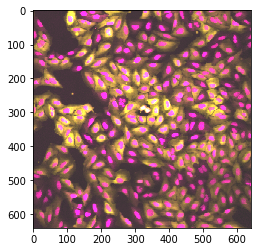

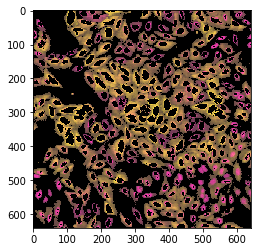

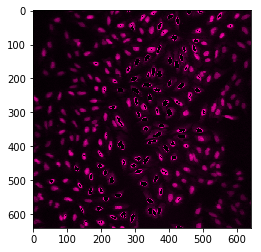

In [10]:
plt.imshow(n_images[0])
plt.show()

# geting the cellls
frame = n_images[0].copy()
cell_hsvmax = (255,255,204)
cell_hsvmin = (102,0,51)
open_thresh = color_thresh = cv2.inRange(frame, cell_hsvmin, cell_hsvmax)
masked = cv2.bitwise_and(frame,frame, mask=open_thresh)
plt.imshow(masked)
plt.show()


# getting the nucleus
frame = img_nucleus.copy()
cell_hsvmax = (255,255,255)
cell_hsvmin = (0,0,0)

nucleus_open_thresh = nucleus_color_thresh = cv2.inRange(frame, cell_hsvmin, cell_hsvmax)
nucleus_masked = cv2.bitwise_and(frame,frame, mask=nucleus_open_thresh)
plt.imshow(nucleus_masked)
plt.show()
